In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
%matplotlib inline

In [ ]:
df = pd.read_csv('dtst.csv')
df.head() 

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,$56.00,4,within an hour,1.0,1.0,2.0,$100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,$36.00,2,within an hour,1.0,1.0,1.0,$100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,$80.00,6,within an hour,1.5,2.0,3.0,$150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,$80.00,2,within a few hours,1.0,1.0,1.0,$100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,$20.00,3,within an hour,1.0,1.0,1.0,$100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment


In [ ]:
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)
df['availability'] = df['availability_365'] / 365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df.describe()

,price,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,guests_included.1,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability
count,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,...,5207.000000,5207.00000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000
mean,136.210486,3.799309,1.287210,1.442673,1.912426,179.400423,51.800077,1.848281,13.289994,3.407720,...,1.848281,176.82946,25.378721,95.745535,9.593048,9.867102,9.882658,9.656232,9.633762,0.484464
std,177.245977,2.511796,0.575333,0.916683,1.361062,237.434907,35.948732,1.476421,19.444712,11.581423,...,1.476421,130.28602,38.664955,5.967414,0.750805,0.448679,0.399602,0.688060,0.657208,0.356948
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,63.000000,2.000000,1.000000,1.000000,1.000000,100.000000,25.000000,1.000000,0.000000,1.000000,...,1.000000,56.00000,2.000000,94.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.153425
50%,99.000000,3.000000,1.000000,1.000000,1.000000,100.000000,50.000000,1.000000,10.000000,2.000000,...,1.000000,155.00000,11.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.424658
75%,155.000000,5.000000,1.500000,2.000000,2.000000,199.000000,60.000000,2.000000,20.000000,2.000000,...,2.000000,311.50000,32.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.853425
max,5000.000000,16.000000,8.000000,10.000000,16.000000,5000.000000,500.000000,15.000000,300.000000,365.000000,...,15.000000,365.00000,410.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
df.isna().sum()

price                          0
accommodates                   0
host_response_time             0
bathrooms                      0
bedrooms                       0
beds                           0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
guests_included.1              0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
house_rules                    0
amenities                      0
bed_type                       0
room_type                      0
cancellation_policy            0
property_type                  0
availability                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207 entries, 0 to 5206
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        5207 non-null   float64
 1   accommodates                 5207 non-null   int64  
 2   host_response_time           5207 non-null   object 
 3   bathrooms                    5207 non-null   float64
 4   bedrooms                     5207 non-null   float64
 5   beds                         5207 non-null   float64
 6   security_deposit             5207 non-null   float64
 7   cleaning_fee                 5207 non-null   float64
 8   guests_included              5207 non-null   int64  
 9   extra_people                 5207 non-null   float64
 10  minimum_nights               5207 non-null   int64  
 11  maximum_nights               5207 non-null   int64  
 12  guests_included.1            5207 non-null   int64  
 13  availability_365  

In [ ]:
ammenities = []
for string in df['amenities']:
  ammenities.extend(string[1:-1].replace("\"", '').split(','))
print(len(set(ammenities)))

105


In [ ]:
df['amenities'] = df['amenities'].apply(lambda x : x[1:-1].replace("\"", '').split(','))
df['amenities'] = df['amenities'].apply(lambda x : len(set(x)))

df.drop(['house_rules', ], axis=1, inplace=True)

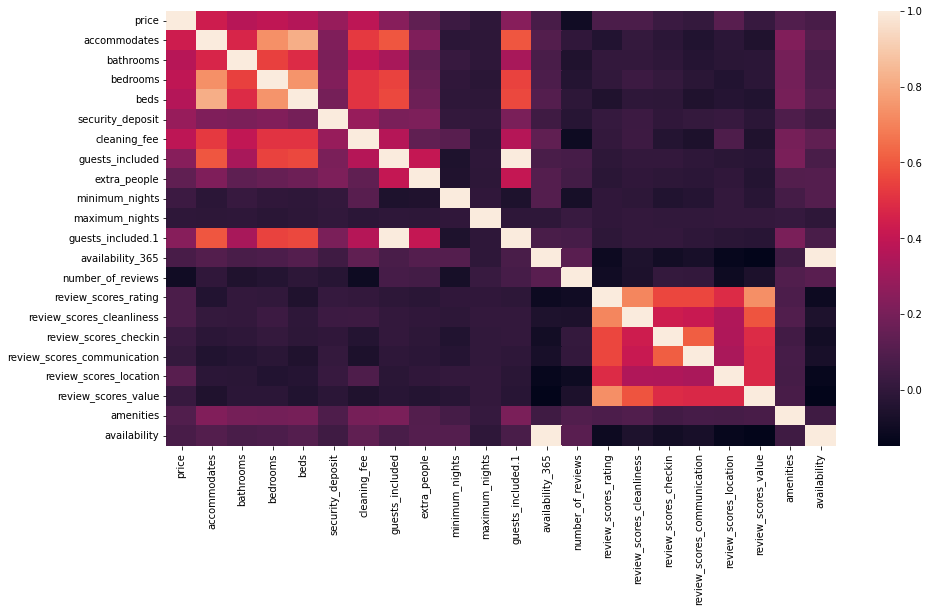

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(15, 8))
sns.heatmap(df.corr(), annot=False, ax=ax)

In [ ]:
df = pd.get_dummies(df, columns=['host_response_time', 'bed_type',	'room_type',	'cancellation_policy',	'property_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


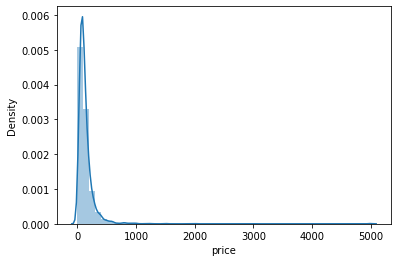

In [ ]:
sns.distplot(df['price'])

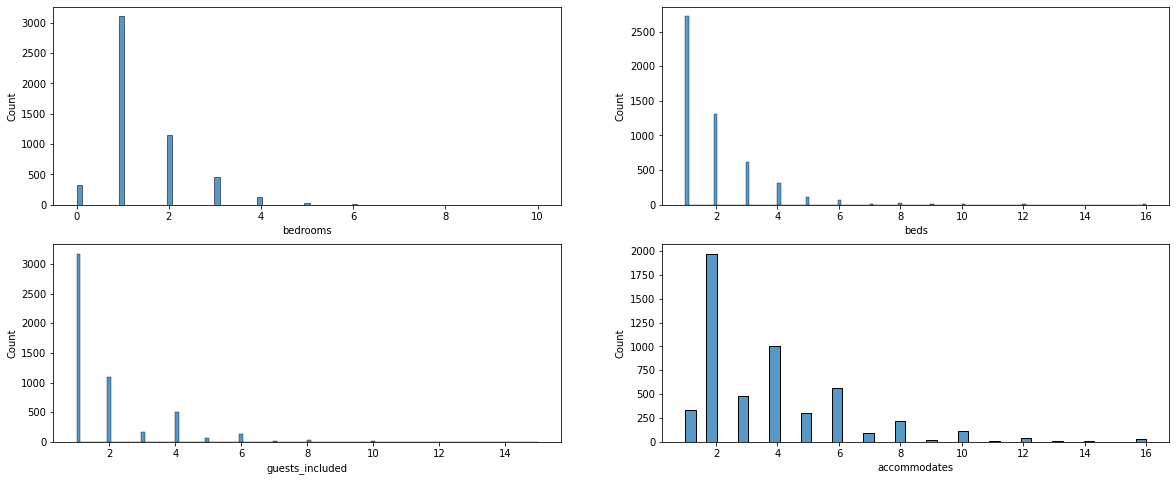

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20, 8))
sns.histplot(data=df, x="bedrooms", multiple="stack", ax=ax[0][0])
sns.histplot(data=df, x="beds", multiple="stack", ax=ax[0][1])
sns.histplot(data=df, x="guests_included", multiple="stack", ax=ax[1][0])
sns.histplot(data=df, x="accommodates", multiple="stack", ax=ax[1][1])


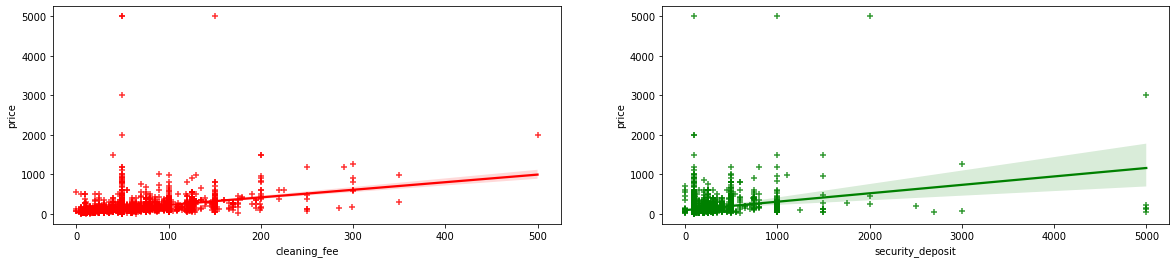

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,4))
sns.regplot(x=df['cleaning_fee'], y=df['price'], marker="+", ax=ax[0], color='red')
sns.regplot(x=df['security_deposit'], y=df['price'], marker="+", ax=ax[1], color='g')

In [ ]:
X=df.drop('price', axis=1)
y=df['price']

In [ ]:
scaler = StandardScaler()
sc = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rfc = RandomForestRegressor(random_state=42)

param_grid = { 
    'n_estimators': [80, 100, 120, 150],
    'max_depth' : [4,5,6,7,8,9,12,14],

}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 12, 14],
                         'n_estimators': [80, 100, 120, 150]})

In [ ]:
print("Squared error : {}".format(CV_rfc.best_score_))

Squared error : 0.3656371533429249


In [ ]:
clf = RandomForestRegressor(**CV_rfc.best_params_)
#Fit Model
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=80)

In [ ]:
y_pred = clf.predict(X_test)
print(mean_squared_log_error(y_test, y_pred), mean_absolute_error(y_test, y_pred))

0.21758996792310298 44.472079481708825


In [ ]:
y_pred_train = clf.predict(X_train)
print(mean_squared_log_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train))

0.10356350196477257 29.45376675949487


In [ ]:
algorithms = ['Random Forest', 'Random Forest', 'Multi Layer Perceptron', 'Multi Layer Perceptron']

mean_log_error = [mean_squared_log_error(y_train, y_pred_train), mean_squared_log_error(y_test, y_pred)]
mean_abs_error = [mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred)]


In [ ]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')

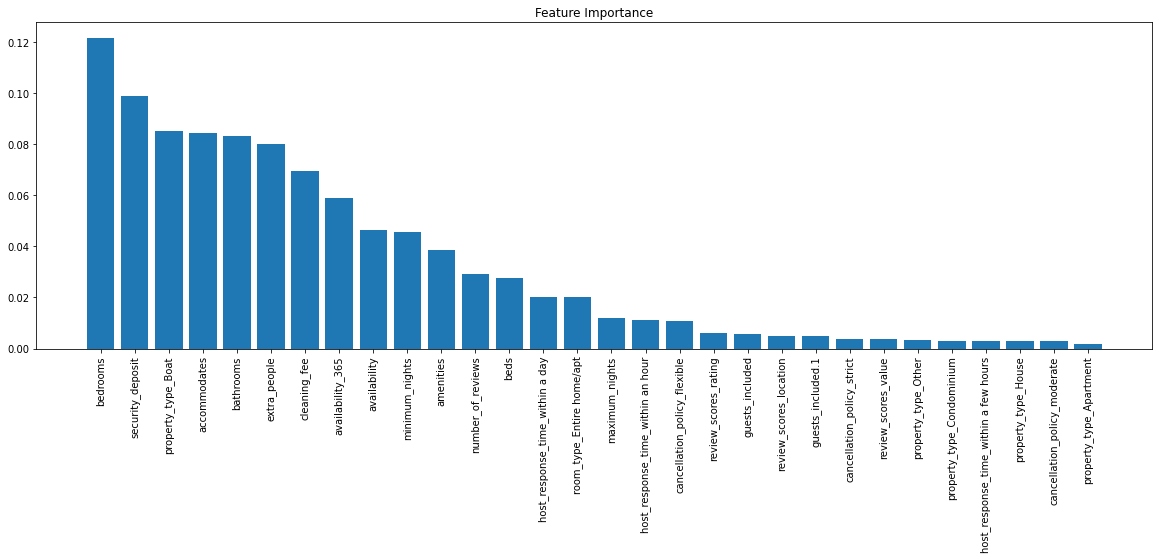

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
ax.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

In [ ]:
mlpr = MLPRegressor(max_iter=7000)

param_list = {"hidden_layer_sizes": [1,50], "activation": ["relu"], 
              "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list)
gridCV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the n

GridSearchCV(estimator=MLPRegressor(max_iter=7000),
             param_grid={'activation': ['relu'], 'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
print("Squared error : {}".format(gridCV.best_score_))

Squared error : 0.09299763829877343


In [ ]:
MLPclf = MLPRegressor(max_iter=7000, **gridCV.best_params_)
#Fit Model
MLPclf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=5e-05, hidden_layer_sizes=1, max_iter=7000, solver='lbfgs')

In [ ]:
y_pred = MLPclf.predict(X_test)
print(mean_squared_log_error(y_test, y_pred), mean_absolute_error(y_test, y_pred))

0.9638814594221199 85.54705610723748


In [ ]:
y_pred_train = MLPclf.predict(X_train)
y_pred_train[y_pred_train < 0] = 0
print(mean_squared_log_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train))

1.0433211633225599 89.88692833514217


In [ ]:
mean_log_error.append(mean_squared_log_error(y_train, y_pred_train))
mean_log_error.append(mean_squared_log_error(y_test, y_pred))

mean_abs_error.append(mean_absolute_error(y_train, y_pred_train))
mean_abs_error.append(mean_absolute_error(y_test, y_pred))


In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(algorithms, mean_log_error, mean_abs_error)), columns=['algorithms', 'mean_log_error',
                                                                                  'mean_absolute_error'])
df[''] = ['Train-set', 'Test-set', 'Train-set', 'Test-set']
df['sample size'] = [X_train.shape[0], X_test.shape[0], X_train.shape[0], X_test.shape[0]]

df.groupby(['algorithms', '']).mean()

mean_log_error  mean_absolute_error  \
algorithms                                                              
Multi Layer Perceptron Test-set         0.963881            85.547056   
                       Train-set        1.043321            89.886928   
Random Forest          Test-set         0.217590            44.472079   
                       Train-set        0.103564            29.453767   

                                  sample size  
algorithms                                     
Multi Layer Perceptron Test-set        1042.0  
                       Train-set       4165.0  
Random Forest          Test-set        1042.0  
                       Train-set       4165.0

#Boosting algorithm

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 22 kB/s 


In [13]:
import catboost as cb
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

gridCV = GridSearchCV(estimator=model, param_grid=grid)
gridCV.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 192.3874775	total: 3.78ms	remaining: 753ms
1:	learn: 182.5557719	total: 7.39ms	remaining: 731ms
2:	learn: 173.9236665	total: 11ms	remaining: 720ms
3:	learn: 165.1351179	total: 14.3ms	remaining: 703ms
4:	learn: 158.1925753	total: 17.9ms	remaining: 698ms
5:	learn: 150.6087849	total: 21.3ms	remaining: 688ms
6:	learn: 144.7259559	total: 24.6ms	remaining: 679ms
7:	learn: 139.7426223	total: 28ms	remaining: 672ms
8:	learn: 134.5740974	total: 31.4ms	remaining: 667ms
9:	learn: 129.8355619	total: 34.9ms	remaining: 662ms
10:	learn: 125.8772817	total: 38.2ms	remaining: 657ms
11:	learn: 122.3234113	total: 43.9ms	remaining: 688ms
12:	learn: 117.5526502	total: 49.5ms	remaining: 712ms
13:	learn: 113.7065987	total: 56ms	remaining: 744ms
14:	learn: 110.3644140	total: 59.3ms	remaining: 731ms
15:	learn: 106.2467027	total: 62.5ms	remaining: 719ms
16:	learn: 102.8367506	total: 65.6ms	remaining: 706ms
17:	learn: 100.1441718	total: 68.7ms	remaining:

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7ff2be944490>,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1]})

In [14]:
y_pred = gridCV.predict(X_test)
print(mean_squared_log_error(y_test, y_pred), mean_absolute_error(y_test, y_pred))

0.21038041172797414 43.9318758430675


In [15]:
y_pred_train = gridCV.predict(X_train)
y_pred_train[y_pred_train < 0] = 0
print(mean_squared_log_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train))

0.10094498048615057 25.39297213394059
